# Visualization of the simulation outputs

To understand the concrete impacts of a set of policy inputs on the transporation network, we have provided an utility called `visualization.py` (located in the `/utilities` folder) to **process** and **visualize the inputs and outputs of each BISTRO run**. <br> In this notebook, we demonstrate the use of the script with the BAU scenario but you can use it for any other BISTRO run by adapting the paths accordingly.

*Note*: It is assumed that this notebook is started from the `/example` folder.

The notebook is organized as follows:<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inputs</a></span><ul class="toc-item"><li><span><a href="#Incentives" data-toc-modified-id="Incentives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incentives</a></span></li><li><span><a href="#FleetMix" data-toc-modified-id="FleetMix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>FleetMix</a></span></li><li><span><a href="#Fares" data-toc-modified-id="Fares-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fares</a></span></li><li><span><a href="#Bus-frequency" data-toc-modified-id="Bus-frequency-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bus frequency</a></span></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores</a></span><ul class="toc-item"><li><span><a href="#Raw-scores" data-toc-modified-id="Raw-scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Raw scores</a></span></li><li><span><a href="#Good-/-Bad-score---Merged" data-toc-modified-id="Good-/-Bad-score---Merged-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Good / Bad score - Merged</a></span></li><li><span><a href="#Weighted-unstacked" data-toc-modified-id="Weighted-unstacked-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Weighted unstacked</a></span></li><li><span><a href="#Stacked" data-toc-modified-id="Stacked-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Stacked</a></span></li></ul></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Mode-Choice-by-hour-of-the-day" data-toc-modified-id="Mode-Choice-by-hour-of-the-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mode Choice by hour of the day</a></span></li><li><span><a href="#Mode-Choice-per-income-group" data-toc-modified-id="Mode-Choice-per-income-group-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mode Choice per income group</a></span></li><li><span><a href="#Mode-Choice-per-age-group" data-toc-modified-id="Mode-Choice-per-age-group-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mode Choice per age group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Other-trips" data-toc-modified-id="Other-trips-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Other trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time-by-mode" data-toc-modified-id="Average-travel-time-by-mode-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average travel time by mode</a></span></li><li><span><a href="#Travel-time-by-mode-over-the-day" data-toc-modified-id="Travel-time-by-mode-over-the-day-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Travel time by mode over the day</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

In [12]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import seaborn as sns
sns.set()
%matplotlib inline

# Adding the module to the path for future import
# Note that the following is idempotent when this notebook is run from "/examples"
import sys
import os
from os import path
from pathlib import Path
os.chdir('../utilities')
import visualization as viz

import tqdm
import math

# To parse .xml output files
from lxml import etree


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing the data 

To use this notebook for other scenarios than the BAU, change the `output folder` and the `ITER_NUMBER` below.

In [26]:
path_input = (Path.cwd().parent / "submission-inputs").absolute()

path_bau_stats = (Path.cwd().parent / "reference-data/sioux_faux/bau/stats").absolute()

# Output folder of BAU
path_warm_start_1k = (Path.cwd().parent / "reference-data/sioux_faux/bau/warm-start/sioux_faux-1k__warm-start").absolute()
path_warm_start_1k = viz.unzip_file(path_warm_start_1k)
path_warm_start_15k = (Path.cwd().parent / "reference-data/sioux_faux/bau/warm-start/sioux_faux-15k__warm-start").absolute()
path_warm_start_15k = viz.unzip_file(path_warm_start_15k)

# **********CHANGE OUTPUT FOLDER*****************#
# Output folder of simulation
output_folder = path_warm_start_15k

# Importing all xml files from the output folder
path_df = pd.read_csv(output_folder / "path_traversals_dataframe.csv")
routes_df = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/trips.txt")
trips_df = pd.read_csv(output_folder / "trips_dataframe.csv")
legs_df = pd.read_csv(output_folder / "legs_dataframe.csv", index_col=0)
person_df = pd.read_csv(output_folder / "persons_dataframe.csv")
trip_to_route = routes_df[["trip_id", "route_id"]].set_index("trip_id", drop=True).T.to_dict('records')[0]


# Importing `availableVehicleTypes.csv` file
available_bus_types = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/availableVehicleTypes.csv")
available_bus_types = available_bus_types[["vehicleTypeId", "seatingCapacity"]].set_index("vehicleTypeId", drop=True).T.to_dict("records")[0]

COMPETITION = "competition"
SUBMISSION_INPUTS = "submission-inputs"
ITERS = "ITERS"
# **********CHANGE ITER_NUMBER*****************#
ITER_NUMBER = 100
ITER_FOLDER = f"it.{ITER_NUMBER}"

Defining some fixed variables for inputs

In [63]:
max_incentive = 50
max_income = 150000
max_age = 120
route_ids = np.arange(1340, 1352)
buses_list = ["BUS-DEFAULT", "BUS-SMALL-HD", "BUS-STD-HD", "BUS-STD-ART"]
agency_ids = [217]
max_fare = 10
operational_costs = {"BUS-DEFAULT" : 89.88,
                     "BUS-SMALL_HD": 90.18,
                     "BUS-STD_HD"  : 90.18,
                     "BUS-STD_ART" : 97.26
                    }


## Inputs

### Incentives

Importing the `ModeIncentives.csv ` input file

In [175]:
incentives_data = output_folder / COMPETITION / SUBMISSION_INPUTS / "ModeIncentives.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [206]:
incentives_plotting_data = viz.process_incentives_data(incentives_data, max_incentive)

Plotting the incentives inputs. For the BAU, no incentives are provided. 

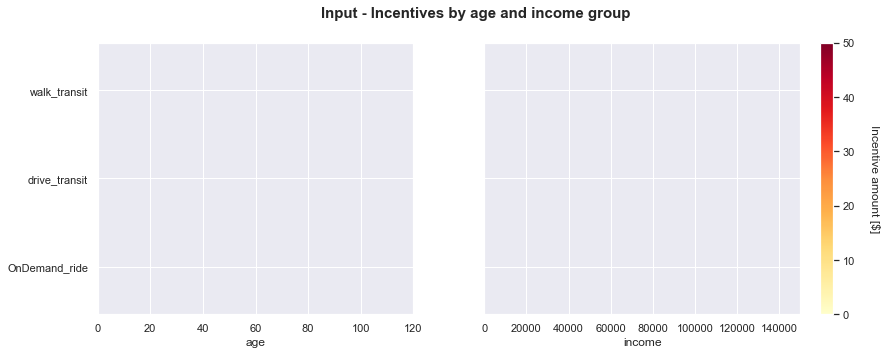

In [177]:
_ = viz.plot_incentives_inputs(incentives_data, max_incentive, max_age, max_income)

### FleetMix

Importing the `FleetMix.csv ` input file

In [197]:
fleet_mix_data =  output_folder / COMPETITION / SUBMISSION_INPUTS / "VehicleFleetMix.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [202]:
bus_plotting_data = viz.process_bus_data(fleet_mix_data, route_ids, buses_list, agency_ids)

Plotting the vehicle fleet mix inputs. For the BAU, all bus lines are operating with `BUS-DEFAULT` buses. 

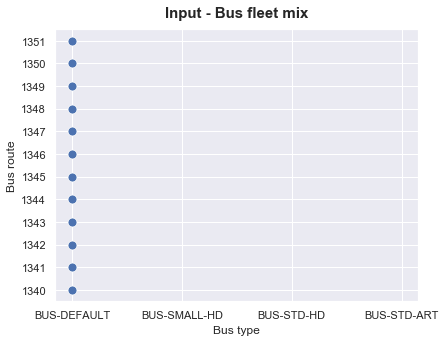

In [207]:
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_data, route_ids, buses_list, agency_ids)

### Fares

Importing the `MassTransitFares.csv` input file

In [93]:
fares_data = output_folder / COMPETITION / SUBMISSION_INPUTS / "MassTransitFares.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [77]:
fares_plotting_data = viz.process_fares_data(fares_data,input_fares_bau_15k, max_fare, route_ids)


Plotting the Mass Transit Fares inputs. For the BAU, the Sioux Faux bus fare policy works as follow: 
* Children 5 yrs. and under\: FREE
* Children 6 to 10 yrs.\: \$0.75
* Children 11 to 18 yrs and Adults 65 yrs. and under: \$1.50
* Persons over 65 yrs\: FREE

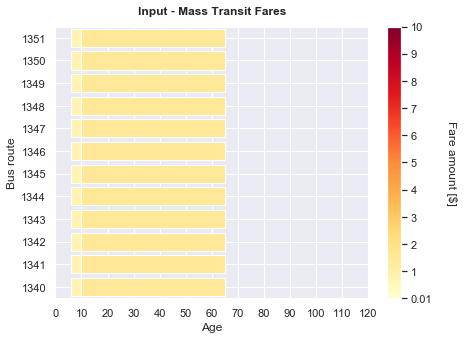

In [78]:
viz.plot_mass_transit_fares_inputs(fares_data, input_fares_bau_15k, max_fare, route_ids)

### Bus frequency

Importing the `FrequencyAdjustment.csv` input file.

In [22]:
bus_frequencies_data = output_folder / COMPETITION / SUBMISSION_INPUTS / "FrequencyAdjustment.csv"


Note that the `FrequencyAdjustement.csv` input file of the BAU is empty as the BAU bus schedule is a non-frequency based schedule. There was not any function implemented to plot the frequencies.txt file of hte BAU bus schedule.
<br> Thus, this section 2.4 will be useful to plot the `FrequencyAdjustement.csv` input file of new runs (with different inputs than the BAU) only.

In [23]:
pd.read_csv(input_bus_frequencies_bau_15k)

,trip_id,start_time,end_time,headway_secs,exact_times


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [17]:
frequencies = viz.process_frequency_data(bus_frequencies_data, route_ids)

Plotting the Mass Transit Fares inputs.

In [ ]:
_ = viz.plot_bus_frequency(bus_frequencies_data, route_ids)

## Scores

In [ ]:
# Get data
scores_data_bau = path.join(warm_start_output_path, "competition/submissionScores.csv")


In [20]:
# scores = pd.read_csv(scores_data_random_good)
# scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
#            'Accessibility: Number of secondary locations accessible within 15 minutes',   
#            'Accessibility: Number of work locations accessible within 15 minutes',
#            'Congestion: average vehicle delay per passenger trip',
#            'Congestion: total vehicle miles traveled',
#            'Level of service: average bus crowding experienced',
#            'Level of service: average on-demand ride wait times',
#            'Level of service: average trip expenditure - secondary',
#            'Level of service: average trip expenditure - work',
#            'Mass transit level of service intervention: costs and benefits',
#            'Sustainability: Total PM 2.5 Emissions',
#             'Submission Score'])
# scores = scores.sort_values(by="Component Name")
# scores

,Component Name,Weight,Raw Score,Weighted Score
2,Accessibility: Number of secondary locations accessible within 15 minutes,0.90,0.996779,0.997101
1,Accessibility: Number of work locations accessible within 15 minutes,0.90,1.022898,1.020585
9,Congestion: average vehicle delay per passenger trip,1.00,0.970624,0.970624
5,Congestion: total vehicle miles traveled,1.00,0.965495,0.965495
6,Level of service: average bus crowding experienced,0.05,0.752261,0.985867
4,Level of service: average on-demand ride wait times,1.00,1.058955,1.058955
7,Level of service: average trip expenditure - secondary,1.00,1.024664,1.024664
8,Level of service: average trip expenditure - work,1.00,0.961431,0.961431
0,Mass transit level of service intervention: costs and benefits,1.00,0.779935,0.779935
3,Sustainability: Total PM 2.5 Emissions,1.00,0.934568,0.934568


### Raw scores 

In [14]:
def prepare_raw_scores_to_plot(raw_scores_data):
    #raw_scores_data = path of the submissionsScores.csv file
    scores = pd.read_csv(raw_scores_data) 
    scores = scores.loc[:,["Component Name","Raw Score"]]
    #Drop the `subission score` row
    scores = scores.drop(index = 10, axis = 0)
    scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
           'Accessibility: Number of secondary locations accessible within 15 minutes',   
           'Accessibility: Number of work locations accessible within 15 minutes',
           'Congestion: average vehicle delay per passenger trip',
           'Congestion: total vehicle miles traveled',
           'Level of service: average bus crowding experienced',
           'Level of service: average on-demand ride wait times',
           'Level of service: average trip expenditure - secondary',
           'Level of service: average trip expenditure - work',
           'Mass transit level of service intervention: costs and benefits',
           'Sustainability: Total PM 2.5 Emissions'])

    scores = scores.sort_values(by="Component Name")
    scores.iloc[:2, 1] = scores.iloc[:2, 1].apply(np.reciprocal)
    scores["Subscores"] = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
    return scores

In [15]:
prepare_raw_scores_to_plot(scores_data_random_good)

,Component Name,Weight,Raw Score,Weighted Score,Subscores
2,Accessibility: Number of secondary locations a...,1.111111,0.996779,0.997101,A
1,Accessibility: Number of work locations access...,1.111111,1.022898,1.020585,B
9,Congestion: average vehicle delay per passenge...,1.000000,0.970624,0.970624,C
5,Congestion: total vehicle miles traveled,1.000000,0.965495,0.965495,D
6,Level of service: average bus crowding experie...,0.050000,0.752261,0.985867,E
4,Level of service: average on-demand ride wait ...,1.000000,1.058955,1.058955,F
7,Level of service: average trip expenditure - s...,1.000000,1.024664,1.024664,G
8,Level of service: average trip expenditure - work,1.000000,0.961431,0.961431,H
0,Mass transit level of service intervention: co...,1.000000,0.779935,0.779935,I
3,Sustainability: Total PM 2.5 Emissions,1.000000,0.934568,0.934568,J


In [188]:
raw_scores_random_good = prepare_raw_scores_to_plot(scores_data_random_good)
raw_scores_random_bad = prepare_raw_scores_to_plot(scores_data_random_bad)

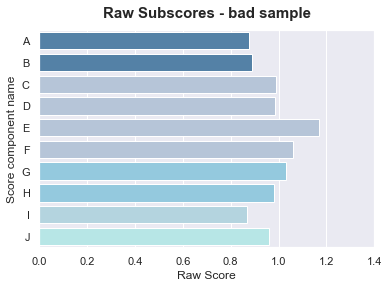

In [190]:
sns.barplot(x="Raw Score", y="Subscores", data=raw_scores_random_bad, palette=['steelblue', 'steelblue','lightsteelblue',
                                                'lightsteelblue', 'lightsteelblue','lightsteelblue','skyblue','skyblue',
                                                                          'lightblue','paleturquoise' ])
plt.yticks(fontsize = 11)
plt.xlabel("Raw Score")
plt.ylabel("Score component name")
plt.xlim(xmax = 1.4)
plt.title("Raw Subscores - bad sample", fontweight = "bold", pad=12, fontsize = 15)
plt.savefig("Raw_Subscores-Bad_sample")
plt.show()

### Good / Bad score - Merged

In [191]:
raw_scores_random_good = prepare_raw_scores_to_plot(scores_data_random_good)
raw_scores_random_good["sample"] = ["Sample 2"]*len(raw_scores_random_good["Subscores"])

raw_scores_random_bad = prepare_raw_scores_to_plot(scores_data_random_bad)
raw_scores_random_bad["sample"] = ["Sample 1"]*len(raw_scores_random_bad["Subscores"])

raw_scores_random = pd.concat([raw_scores_random_bad, raw_scores_random_good])

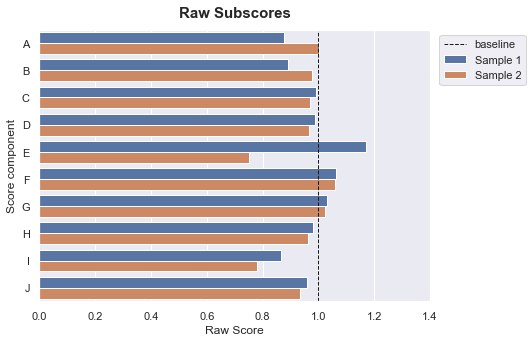

In [192]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.barplot(data = raw_scores_random, x= "Raw Score", y = "Subscores", hue = "sample")
plt.axvline(x=1.0,linewidth=1, color='k', ls='dashed', label = "baseline")
plt.legend(bbox_to_anchor=(1.01,1), loc = "upper left")
plt.yticks(fontsize = 11)
plt.xlabel("Raw Score")
plt.ylabel("Score component")
plt.xlim(xmax = 1.4)
plt.title("Raw Subscores", fontweight = "bold", pad=12, fontsize = 15)
plt.savefig("Raw_Subscores-Good_vs_Bad_sample", bbox_inches="tight")
plt.show()

### Weighted unstacked

In [44]:
scores = pd.read_csv(scores_data) 
scores = scores.loc[:,["Component Name","Weighted Score"]]
scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
       'Submission Score',
       'Accessibility: Number of work locations accessible within 15 minutes',
       'Accessibility: Number of secondary locations accessible within 15 minutes',
       'Level of service: average bus crowding experienced',
       'Level of service: average on-demand ride wait times',
       'Level of service: average trip expenditure - work',
       'Level of service: average trip expenditure - secondary',
       'Congestion: average vehicle delay per passenger trip',
       'Congestion: total vehicle miles traveled',
       'Mass transit level of service intervention: costs and benefits',
       'Sustainability: Total PM 2.5 Emissions'])

scores = scores.sort_values(by="Component Name")

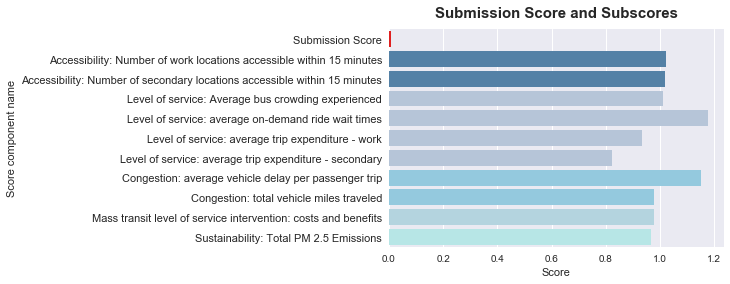

In [45]:
sns.barplot(x="Weighted Score", y="Component Name", data=scores, palette=['red','steelblue', 'steelblue','lightsteelblue',
                                                'lightsteelblue', 'lightsteelblue','lightsteelblue','skyblue','skyblue',
                                                                          'lightblue','paleturquoise' ])
plt.yticks(fontsize = 11)
plt.xlabel("Score")
plt.ylabel("Score component name")
plt.title("Submission Score and Subscores", fontweight = "bold", pad=12, fontsize = 15)
plt.show()

### Stacked

In [46]:
scores= pd.read_csv(scores_data) 
scores = scores.T
scores.columns=scores.iloc[0]
scores = scores.loc[["Weighted Score"],:]
scores = scores.drop(["Submission Score"], axis = 1)

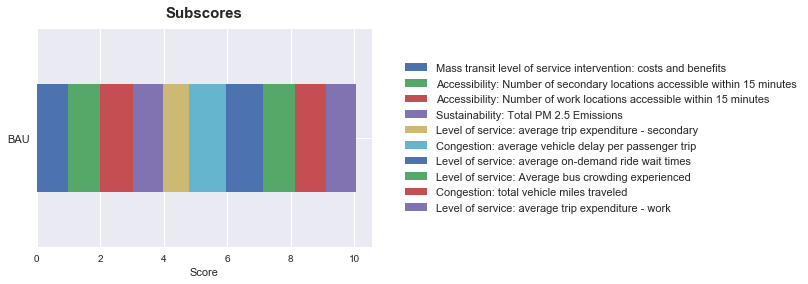

In [47]:
scores.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
plt.yticks([0],['BAU'],fontsize = 11 )
plt.xlabel("Score", fontsize = 11)
plt.legend(fontsize = 11, bbox_to_anchor=(2.3,0.5), loc="right")
plt.title("Subscores",fontweight = "bold", pad=12, fontsize = 15)
plt.show()

## Mode choice

Importing the `modeChoice.csv` output file.

In [48]:
mode_choice_data = output_folder / "modeChoice.csv"


### Overall mode choice

Processing and reorganizing the data in an input dataframe to be ready for plotting

In [49]:
mode_choice = viz.process_mode_choice(mode_choice_data)

Plotting the Overall Mode Choice output.

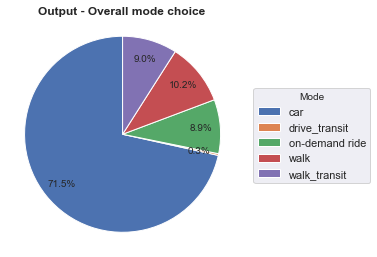

In [50]:
viz.plot_mode_choice(mode_choice_data)

### Mode Choice by hour of the day

Importing the `100.modeChoice.csv` output file. 

In [27]:
mode_choice_data = output_folder / ITERS / ITER_FOLDER / f"{ITER_NUMBER}.modeChoice.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting.

In [28]:
mode_choice = viz.process_mode_choice_by_hour(mode_choice_data)

Plotting the Mode Choice by hour of the day output.

TypeError: __init__() got an unexpected keyword argument 'palette'

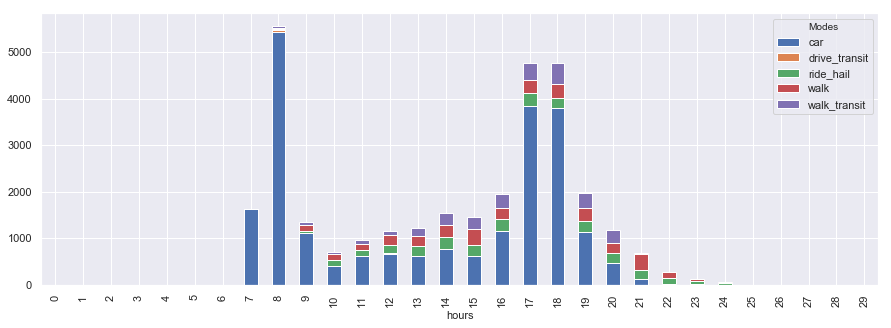

In [36]:
_ = viz.plot_mode_choice_by_hour(mode_choice_data)

### Mode Choice per income group

Plotting the Mode choice per income group output.

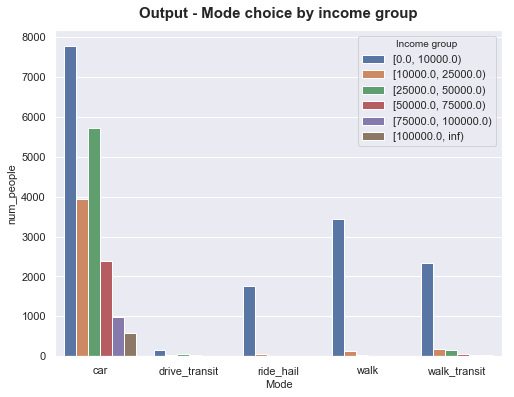

In [6]:
_ = viz.plot_mode_choice_by_income_group(person_df, trips_df)

### Mode Choice per age group

Plotting the Mode choice per age group output.

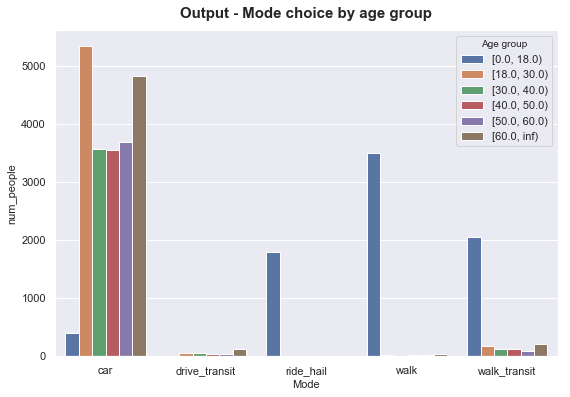

In [11]:
_ = viz.plot_mode_choice_by_age_group(person_df, trips_df)

## Accessibility

### Work-based trips

### Other trips

## Level of service

### Travel expenditure

Plotting the travel expenditure output.

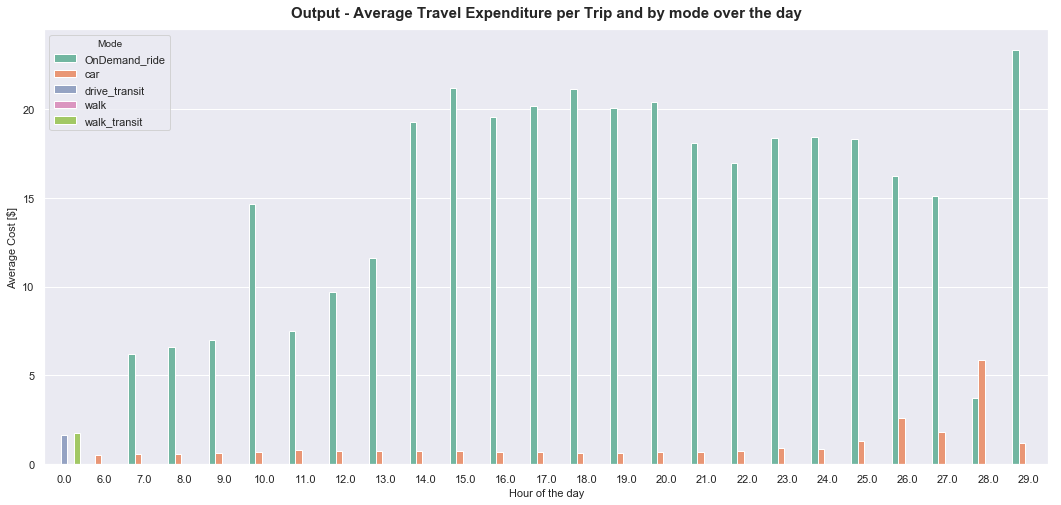

In [37]:
_ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(legs_df)

### Bus crowding

Plotting the `Average Hours of Bus Crowding` output.

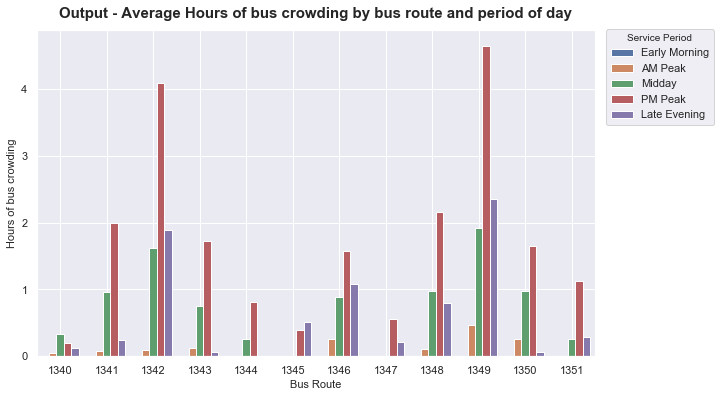

In [22]:
_ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(path_df, trip_to_route, available_bus_types)

## Congestion

### Average travel time by mode

Importing the `averageTravelTimes.csv` output file.

In [38]:
travel_time_data = output_folder / ITERS / ITER_FOLDER / f"{ITER_NUMBER}.averageTravelTimes.csv"

Processing and reorganizing the data in an input dataframe to be ready for plotting.

In [39]:
travel_time = viz.process_travel_time(travel_time_data)

Plotting the `Average travel time by mode` output.

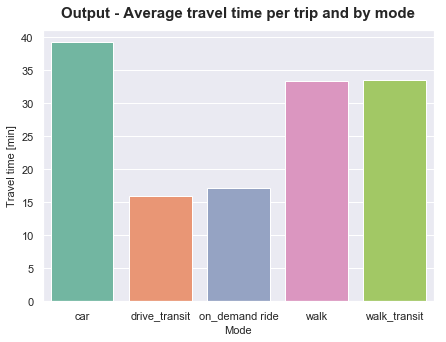

In [41]:
_ = viz.plot_travel_time_by_mode(travel_time_data)

### Travel time by mode over the day

Processing and reorganizing the data in an input dataframe to be ready for plotting.

In [54]:
travel_time_over_the_day = viz.process_travel_time_over_the_day(travel_time_data)

Plotting the `Travel time by mode over the day` output.

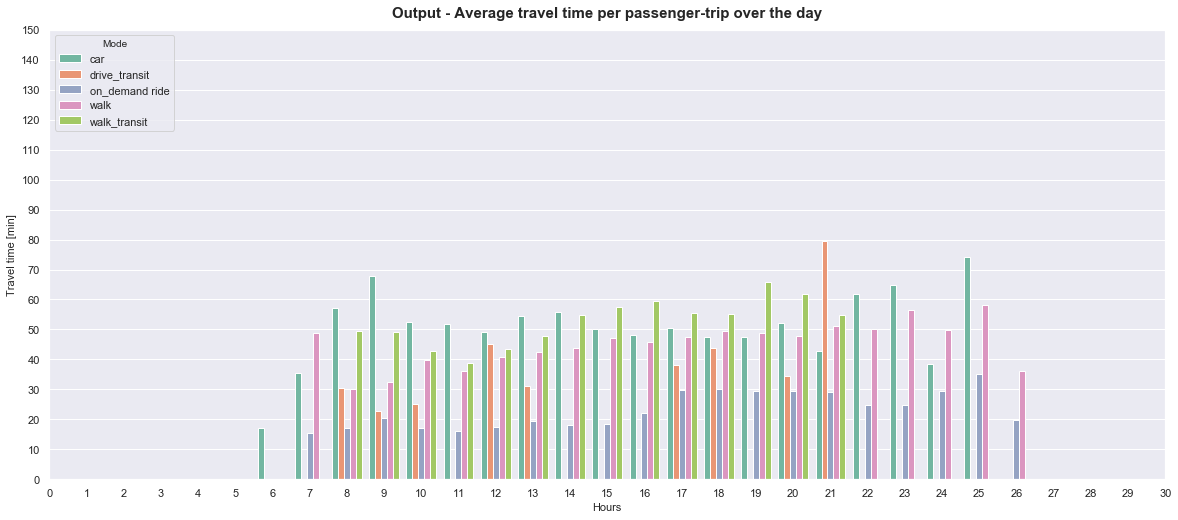

In [60]:
_ = viz.plot_travel_time_over_the_day(travel_time_data)

## Costs and Benefits of Mass Transit Level of Service Intervention

Plotting the `Costs and Benefits by route` output.

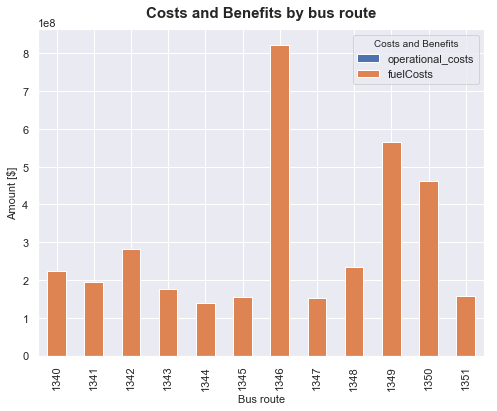

In [67]:
_ = viz.plot_cost_benefits(path_df, operational_costs, trip_to_route)

## Sustainability

In [287]:
routes = pd.read_csv(r"/Users/vgolfi/Documents/GitHub/Uber-Prize-Starter-Kit/reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/routes.txt")
routes = routes.iloc[:, :6]
routes.sort_values(by="route_id")


,agency_id,route_id,route_short_name,route_long_name,route_desc,route_type
0,217,1340,1,South Kiwanis Avenue/VA Medical Center,NaN,3
1,217,1341,2,S. Western/Sanford,NaN,3
4,217,1342,3,Downtown/Southwest Connector,NaN,3
5,217,1343,4,East 10th Street/East 12th Street,NaN,3
6,217,1344,5,South Phillips Avenue/Avera McKennan Hospital,NaN,3
7,217,1345,6,North Prairie Avenue,NaN,3
8,217,1346,7,North Cleveland/East 6th Street/Arrowhead Parkway,NaN,3
9,217,1347,8,North Industrial,NaN,3
10,217,1348,9,South Sycamore/East 26th Street,NaN,3
11,217,1349,10,Hayward/West Side,NaN,3
